In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)
# print(torch.cuda.is_available())

2.9.1+cu130


# Introduction to Tensors

## Creating tensors
Multi-dimensional matrix containing elements of a single data type

In [2]:
# Scalar
scalar = torch.tensor(7)
print(scalar)

tensor(7)


In [3]:
scalar.ndim

0

In [4]:
# Convert scalar to Python number
scalar.item()

7

In [5]:
# Vector
vector = torch.tensor([7, 7])
print(vector)

tensor([7, 7])


In [6]:
vector.ndim

1

In [7]:
vector.shape

torch.Size([2])

In [8]:
# MATRIX
MATRIX = torch.tensor([[7, 8], [9, 10]])
print(MATRIX)

tensor([[ 7,  8],
        [ 9, 10]])


In [9]:
MATRIX.ndim

2

In [10]:
MATRIX.shape

torch.Size([2, 2])

In [11]:
MATRIX[0]

tensor([7, 8])

In [12]:
MATRIX[1][0]

tensor(9)

In [13]:
# TENSOR
TENSOR = torch.tensor([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]], [[13, 14, 15], [16, 17, 18]]])
print(TENSOR)

tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[ 7,  8,  9],
         [10, 11, 12]],

        [[13, 14, 15],
         [16, 17, 18]]])


In [14]:
TENSOR.ndim

3

In [15]:
TENSOR.shape

torch.Size([3, 2, 3])

In [16]:
TENSOR[0]

tensor([[1, 2, 3],
        [4, 5, 6]])

In [17]:
TENSOR[1][0]

tensor([7, 8, 9])

In [18]:
TENSOR[2][1][0]

tensor(16)

In [19]:
TENSOR1 = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7,  8]]])
print(TENSOR1)

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])


In [20]:
TENSOR1.ndim

3

In [21]:
TENSOR1.shape

torch.Size([2, 2, 2])

### Random Tensors

Q. Why random tensors?
A. They are important because the way many neural networks learn is that they start with tensors full of random numbers, and then adjust those random numbers to better represent the data.

`Start with random numbers -> look at data -> update random numbers -> look at data -> update random numbers -> ...`

In [22]:
# Create a random tensor of size (3, 4)
random_tensor = torch.rand(3, 4)
print(random_tensor)

tensor([[0.9790, 0.4689, 0.5529, 0.4796],
        [0.7671, 0.5033, 0.9825, 0.9500],
        [0.6354, 0.7125, 0.6535, 0.5093]])


In [23]:
# Create a random tensor with similar shape to an image tensor
random_image_tensor = torch.rand(size=(3, 224, 224))  # color channels (R G B), height, width
print(random_image_tensor.shape)

torch.Size([3, 224, 224])


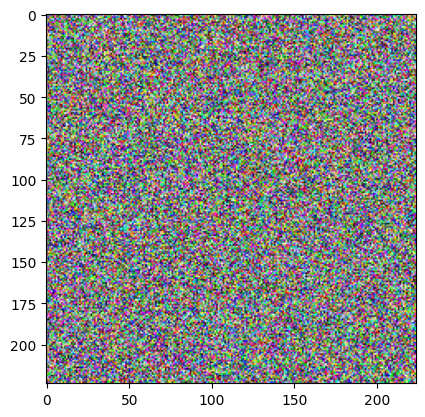

In [24]:
# displays a random image
plt.imshow(random_image_tensor.permute(1, 2, 0))  # permute changes the order of dimensions

### Zeros and ones

In [25]:
# Tensor of all zeros
zeros = torch.zeros(size=(3, 4))
print(zeros)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


In [26]:
zeros * random_tensor

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [27]:
## Tensor of all ones
ones = torch.ones(size=(3, 4))
print(ones)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [28]:
ones.dtype

torch.float32

In [29]:
random_tensor.dtype

torch.float32

### Create range of tensors and tensors-like

In [30]:
# Use torch.arange() to create a tensor of sequential numbers
one_to_ten = torch.arange(1, 11, 1) # torch.arange(start=1, end=11, step=1)
one_to_ten

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [31]:
# Tensors-like objects
ten_zeros = torch.zeros_like(input=one_to_ten)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Tensor datatypes

Ensure tensors are:
- Of right datatype
- Of right shape
- On the right device

In [32]:
# Float 32
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                        dtype=None, # could be torch.float16, torch.float32, torch.float64
                        device=None, # could be 'cuda' for GPU, default is 'cpu'
                        requires_grad=False) # whether to track gradients for optimization
float_32_tensor.dtype

torch.float32

In [33]:
float_16_tensor = float_32_tensor.type(torch.float16)
float_16_tensor.dtype

torch.float16

In [34]:
float_16_tensor * float_32_tensor # PyTorch will upcast the lower bit tensor to the higher bit tensor

tensor([ 9., 36., 81.])

In [35]:
int_32_tensor = torch.tensor([3, 6, 9], dtype=torch.int32)
int_32_tensor

tensor([3, 6, 9], dtype=torch.int32)

In [36]:
float_32_tensor * int_32_tensor # PyTorch will upcast the integer tensor to float tensor

tensor([ 9., 36., 81.])

### Getting information/attributes from tensors

- tensor.dtype
- tensor.shape
- tensor.device

In [37]:
# Create a tensor
sample_tensor = torch.arange(1., 10.)
sample_tensor

tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [38]:
# Find details
sample_tensor.ndim, sample_tensor.shape, sample_tensor.dtype, sample_tensor.device

(1, torch.Size([9]), torch.float32, device(type='cpu'))

In [39]:
print(f"Datatype of tensor: {sample_tensor.dtype}")
print(f"Shape of tensor: {sample_tensor.shape}")
print(f"Numel of tensor: {sample_tensor.numel()}")
print(f"Size of tensor: {sample_tensor.size()}")
print(f"Device of tensor: {sample_tensor.device}")

Datatype of tensor: torch.float32
Shape of tensor: torch.Size([9])
Numel of tensor: 9
Size of tensor: torch.Size([9])
Device of tensor: cpu


In [40]:
# another_tensor = torch.rand(3, 4, dtype=torch.float16, device='cuda')
# another_tensor

In [41]:
# print(f"Datatype of another_tensor: {another_tensor.dtype}")
# print(f"Shape of another_tensor: {another_tensor.shape}")
# print(f"Numel of another_tensor: {another_tensor.numel()}")
# print(f"Device of another_tensor: {another_tensor.device}")